# Introduction
This dataset has been obtained from the __Izmir Open Data Portal__. It contains traffic flow data recorded on major roads across Izmir. The purpose of this analysis is to __examine traffic patterns in the city of Izmir and gain insights into traffic congestion, peak hours, and the effect of extra lanes on vehicle flow__. The results aim to __support urban mobility planning and improve traffic management strategies__ in Izmir.

Data Source: [Izmir Open Data Portal](https://acikveri.bizizmir.com/en/dataset/izmir-ili-arac-sayim-verileri/resource/25866cc4-298a-4ee7-bfd3-719ea7f530b2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("izbb-izum-anaarter-arac-sayim-guncel.xlsx")
df.head()

,TARIH,ANA_ARTER_ADI,ISTIKAMET,BASLAMA,BITIS,ARAC_SAYISI,EK_SERIT,ACIKLAMA
0,2020-08-15,Yeşildere Caddesi,Konak Merkez,08:00:00,08:30:00,1462.0,0,NaN
1,2020-08-15,Yeşildere Caddesi,Gaziemir,18:00:00,18:30:00,1908.0,0,NaN
2,2020-08-16,Yeşildere Caddesi,Konak Merkez,08:00:00,08:30:00,574.0,0,NaN
3,2020-08-16,Yeşildere Caddesi,Gaziemir,18:00:00,18:30:00,1398.0,0,NaN
4,2020-08-17,Yeşildere Caddesi,Konak Merkez,08:00:00,08:30:00,1224.0,0,NaN


# 1. Converting Column Names to English


In [3]:
df.rename(columns={
    "TARIH": "DATE",
    "ANA_ARTER_ADI": "MAIN_ROAD_NAME",
    "ISTIKAMET": "DIRECTION",
    "BASLAMA": "START_TIME",
    "BITIS": "END_TIME",
    "ARAC_SAYISI": "VEHICLE_COUNT",
    "EK_SERIT": "EXTRA_LANE",
    "ACIKLAMA": "NOTES"
}, inplace=True)

In [4]:
df.head()

,DATE,MAIN_ROAD_NAME,DIRECTION,START_TIME,END_TIME,VEHICLE_COUNT,EXTRA_LANE,NOTES
0,2020-08-15,Yeşildere Caddesi,Konak Merkez,08:00:00,08:30:00,1462.0,0,NaN
1,2020-08-15,Yeşildere Caddesi,Gaziemir,18:00:00,18:30:00,1908.0,0,NaN
2,2020-08-16,Yeşildere Caddesi,Konak Merkez,08:00:00,08:30:00,574.0,0,NaN
3,2020-08-16,Yeşildere Caddesi,Gaziemir,18:00:00,18:30:00,1398.0,0,NaN
4,2020-08-17,Yeşildere Caddesi,Konak Merkez,08:00:00,08:30:00,1224.0,0,NaN


# 2. Checking and Filling Missing Values

In [5]:
df.isnull().sum()

DATE                  0
MAIN_ROAD_NAME        0
DIRECTION             0
START_TIME            0
END_TIME              0
VEHICLE_COUNT         9
EXTRA_LANE            0
NOTES             20562
dtype: int64

In [6]:
# Fill missing vehicle counts with group mean
df["VEHICLE_COUNT"] = df.groupby(["MAIN_ROAD_NAME", "DIRECTION", "START_TIME", "END_TIME"])["VEHICLE_COUNT"].transform(lambda x: x.fillna(x.mean()))

This line fills the missing values in the "VEHICLE_COUNT" column by calculating the average vehicle count within groups defined by "MAIN_ROAD_NAME", "DIRECTION", "START_TIME", and "END_TIME". Each missing value is replaced with the mean of its corresponding group.

# 3. Busiest Traffic Hours Analysis



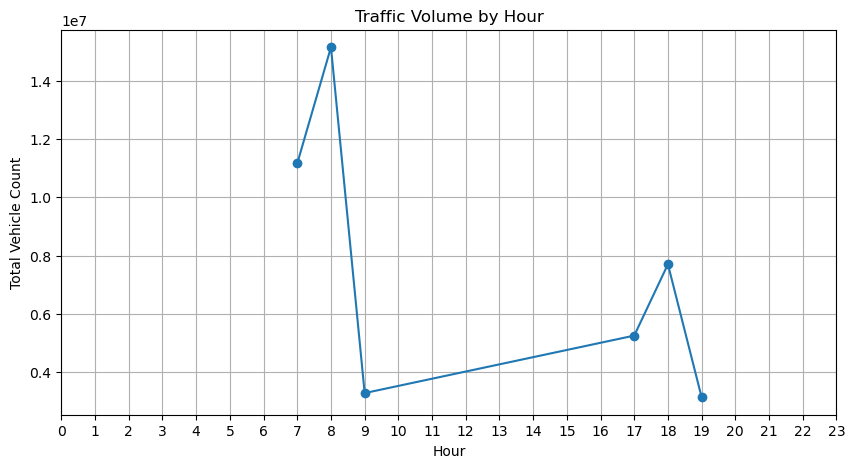

In [7]:
# Extract hour from START_TIME
df["HOUR"] = pd.to_datetime(df["START_TIME"], format="%H:%M:%S").dt.hour

# Group by hour and sum vehicle counts
traffic_by_hour = df.groupby("HOUR")["VEHICLE_COUNT"].sum()

# Plot the traffic volume by hour
plt.figure(figsize=(10, 5))
plt.plot(traffic_by_hour.index, traffic_by_hour.values, marker='o', linestyle='-')
plt.xlabel("Hour")
plt.ylabel("Total Vehicle Count")
plt.title("Traffic Volume by Hour")
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


Traffic volume peaks during morning (08:00 - 09:00) and evening (18:00 - 19:00) rush hours, indicating typical commuting patterns.



# 4. Busiest Roads Analysis

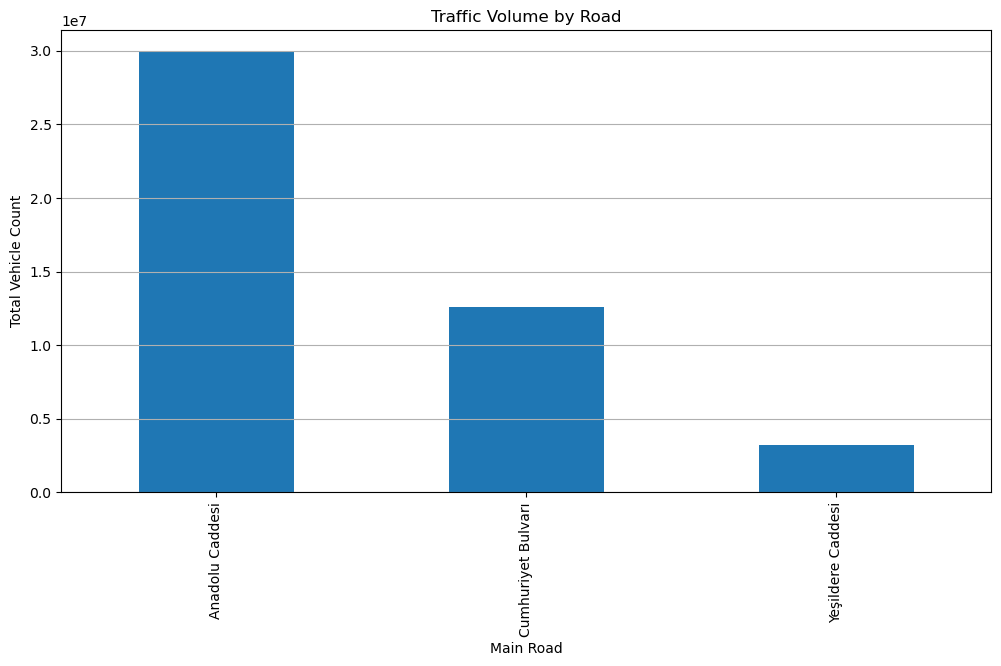

In [8]:
# Group by road name and sum vehicle counts
traffic_by_road = df.groupby("MAIN_ROAD_NAME")["VEHICLE_COUNT"].sum().sort_values(ascending=False)

# Plot the traffic volume by road
plt.figure(figsize=(12, 6))
traffic_by_road.plot(kind="bar")
plt.xlabel("Main Road")
plt.ylabel("Total Vehicle Count")
plt.title("Traffic Volume by Road")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

Certain roads, such as Yeşildere Caddesi, Altınyol, and Anadolu Caddesi, experience the highest traffic volumes. These roads are likely key corridors for daily commuting and inter-district connections.

# 5. Traffic Volume by Day of the Week

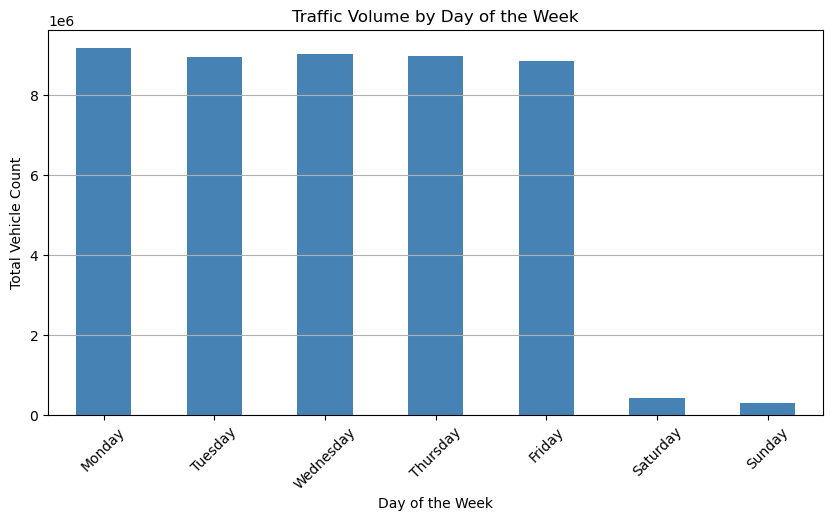

In [9]:
# Extract day of the week from DATE
df["DAY"] = df["DATE"].dt.day_name()

# Group by day and sum vehicle counts
traffic_by_day = df.groupby("DAY")["VEHICLE_COUNT"].sum()

# Custom order for days of the week
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
traffic_by_day = traffic_by_day.reindex(days_order)

# Plot the traffic volume by day of the week
plt.figure(figsize=(10, 5))
traffic_by_day.plot(kind="bar", color="steelblue")
plt.xlabel("Day of the Week")
plt.ylabel("Total Vehicle Count")
plt.title("Traffic Volume by Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Weekdays show significantly higher traffic volume compared to weekends, suggesting that work-related commuting is the main driver of traffic in Izmir.



# 6. Traffic Volume by Month

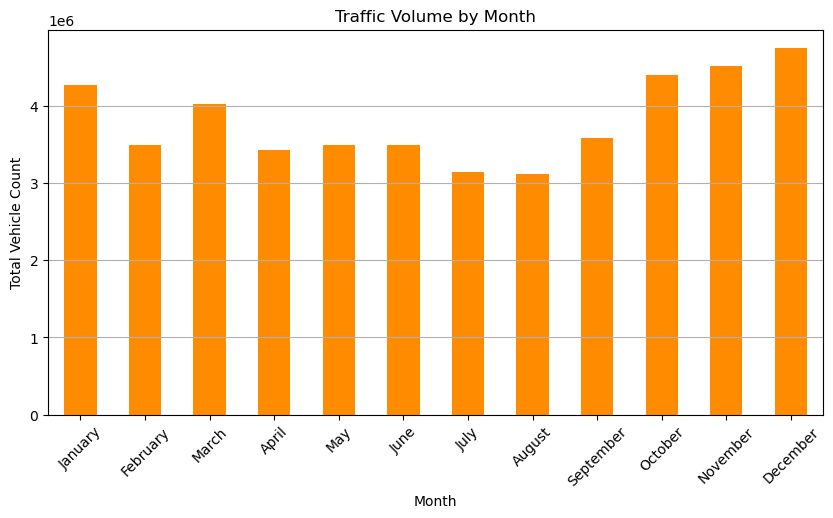

In [10]:
# Extract month name from DATE
df["MONTH"] = df["DATE"].dt.month_name()

# Group by month and sum vehicle counts
traffic_by_month = df.groupby("MONTH")["VEHICLE_COUNT"].sum()

# Custom order for months
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
traffic_by_month = traffic_by_month.reindex(months_order)

# Plot the traffic volume by month
plt.figure(figsize=(10, 5))
traffic_by_month.plot(kind="bar", color="darkorange")
plt.xlabel("Month")
plt.ylabel("Total Vehicle Count")
plt.title("Traffic Volume by Month")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Traffic volume is higher in spring and summer months (May – July), likely due to increased travel and tourism activities, while winter months (January – February) have lower traffic.

# 7. Effect of Extra Lane Usage on Traffic

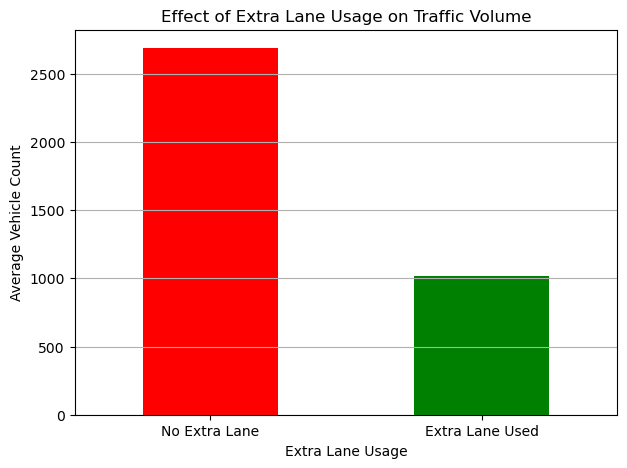

In [11]:
# Group by EXTRA_LANE and calculate the average vehicle count
traffic_by_extra_lane = df.groupby("EXTRA_LANE")["VEHICLE_COUNT"].mean()

# Rename the index values for readability
traffic_by_extra_lane.index = ["No Extra Lane", "Extra Lane Used"]

# Plot the effect of extra lane usage on traffic volume
plt.figure(figsize=(7, 5))
traffic_by_extra_lane.plot(kind="bar", color=["red", "green"])
plt.xlabel("Extra Lane Usage")
plt.ylabel("Average Vehicle Count")
plt.title("Effect of Extra Lane Usage on Traffic Volume")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

We use __mean()__ to compare the average vehicle count when an extra lane is used versus when it is not, instead of the total vehicle count, as the number of observations may differ.

The average vehicle count is higher when an extra lane is used, suggesting that opening extra lanes helps increase traffic capacity during peak periods.

# Urban Planning-Oriented Recommendations

## 1. Peak Hour Traffic Management:
* __Flexible working hours and staggered school schedules__ to reduce congestion during peak times (08:00-09:00, 18:00-19:00).
* __Promotion of public transport__ during peak hours with increased bus, metro, and ferry services.
* __Park & Ride hubs__ at key entry points like Yeşildere and Altınyol to reduce private vehicle use.

## 2. Road Network Optimization:
* __Strengthening secondary roads and alternative routes__ parallel to congested arterials like Yeşildere to distribute traffic flow.
* __Intersection improvements and signal optimization__ at critical junctions such as Konak, Halkapınar, and Basmane.
* __Transit-first approach:__ Prioritize bus lanes and public transport corridors on major roads like Anadolu Caddesi and Mürselpaşa.

## 3. Weekday vs. Weekend Travel Patterns:
* __Pedestrianization and car-free zones__ in popular leisure areas (Alsancak, Kordon) on weekends to reduce congestion.
* __Strengthening suburban recreational areas__ (e.g., Yamanlar Forest, Buca Gölet) to divert leisure traffic away from the city center.


## 4. Seasonal Traffic Variations:
* __Additional public transport services to coastal districts__ (Urla, Çeşme, Seferihisar) during the summer months.
* __Expanding ferry services__ in summer, especially between Üçkuyular and Karşıyaka to relieve road congestion.

## 5. Dynamic Lane and Smart Traffic Systems:
* __Adaptive lane management:__ Implement reversible lanes on high-traffic corridors (Yeşildere, Altınyol) during peak flows.
* __Real-time traffic monitoring and dynamic digital signboards__ to inform drivers of lane openings and alternative routes.

## Core Urban Planning Approach for Izmir:
* Reduce car dependency by integrating transport and land use planning.
* Encourage active mobility (walking and cycling) by enhancing pedestrian and bike networks.
* Prioritize public transport investments in growing residential areas to mitigate future congestion.

These strategies align with sustainable __urban mobility goals__ and can improve traffic flow while __reducing environmental impacts__ in Izmir.